In [105]:
from statsmodels.tsa.seasonal import seasonal_decompose

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings('ignore')

In [77]:
air = pd.read_csv('AirPassengers.csv',index_col=0)

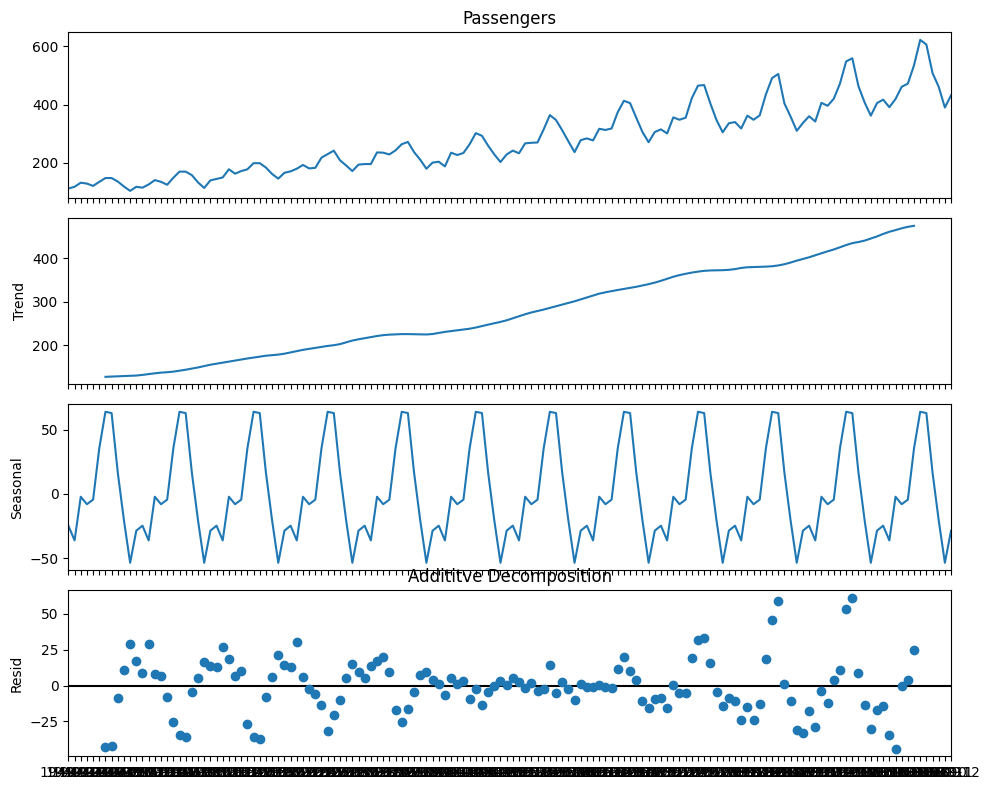

In [78]:
result = seasonal_decompose(air['Passengers'], model='additive', period= 12)

# Adjust Figure size 
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

result.plot()
plt.title('Addititve Decomposition')
plt.show()

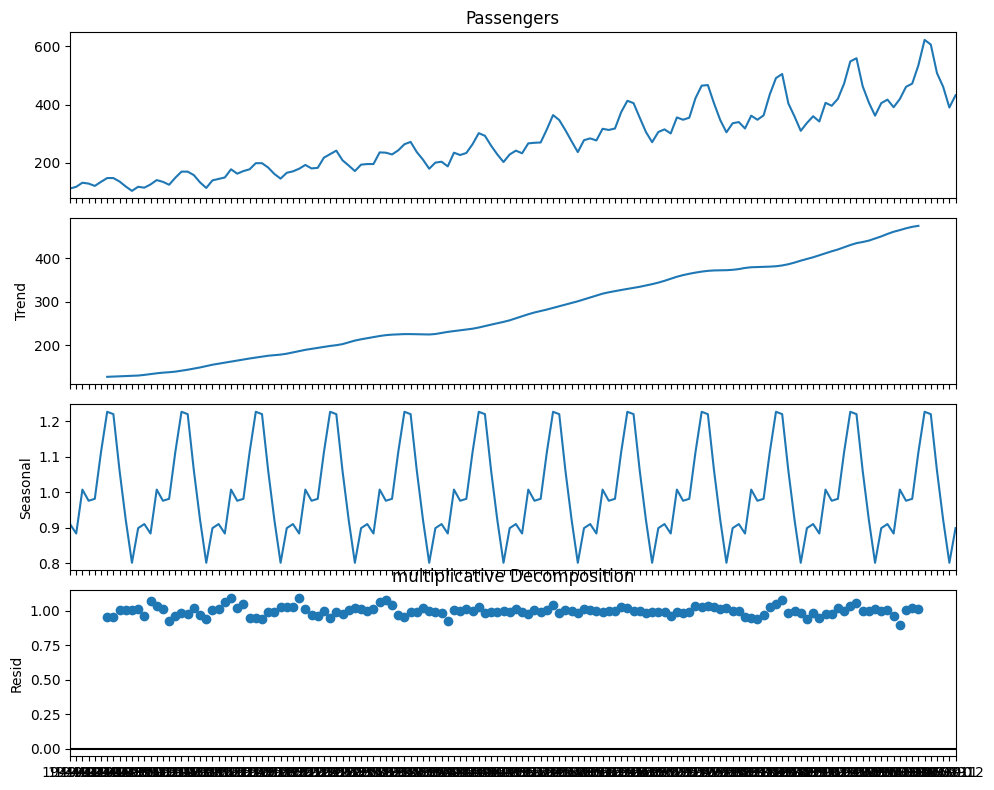

In [79]:
result = seasonal_decompose(air['Passengers'], model='multiplicative', period= 12)

# Adjust Figure size 
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

result.plot()
plt.title('multiplicative Decomposition')
plt.show()

### Comparison fo both Plot in One Plot

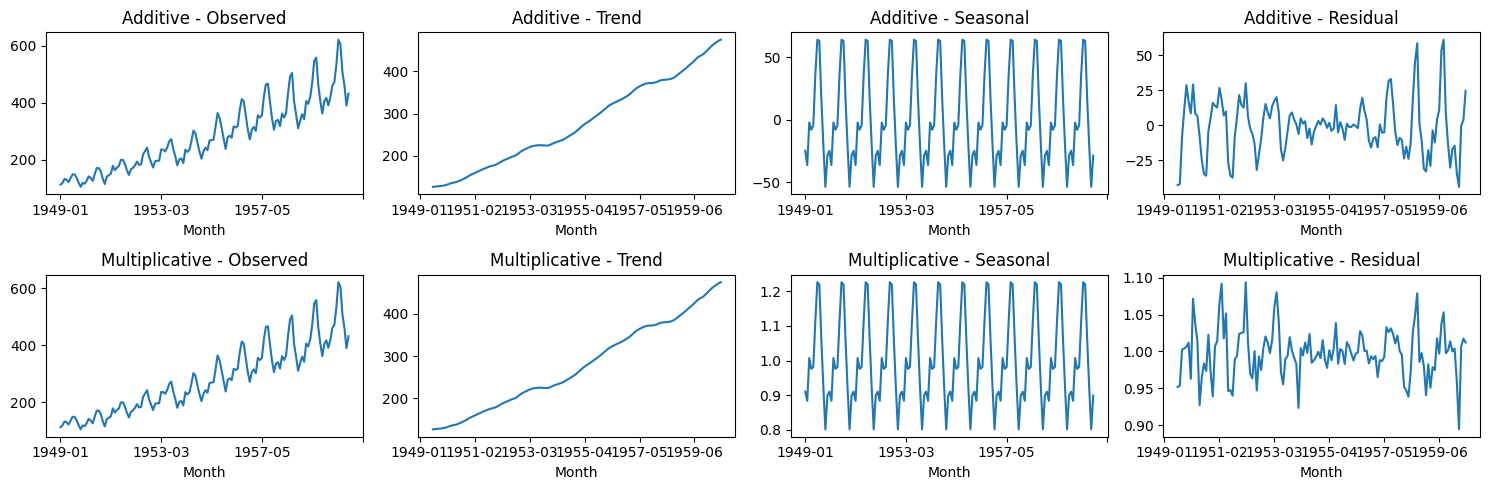

In [80]:
# Set global figure size for all plots
plt.rcParams["figure.figsize"] = [15, 5]

# Create a figure with two rows and four columns for all components
fig, axes = plt.subplots(2, 4)

# Decompose using additive model
result_additive = seasonal_decompose(air['Passengers'], model='additive', period=12)

# Plot the Additive Decomposition components
result_additive.observed.plot(ax=axes[0, 0], title='Additive - Observed', legend=False)
result_additive.trend.plot(ax=axes[0, 1], title='Additive - Trend', legend=False)
result_additive.seasonal.plot(ax=axes[0, 2], title='Additive - Seasonal', legend=False)
result_additive.resid.plot(ax=axes[0, 3], title='Additive - Residual', legend=False)

# Decompose using multiplicative model
result_multiplicative = seasonal_decompose(air['Passengers'], model='multiplicative', period=12)

# Plot the Multiplicative Decomposition components
result_multiplicative.observed.plot(ax=axes[1, 0], title='Multiplicative - Observed', legend=False)
result_multiplicative.trend.plot(ax=axes[1, 1], title='Multiplicative - Trend', legend=False)
result_multiplicative.seasonal.plot(ax=axes[1, 2], title='Multiplicative - Seasonal', legend=False)
result_multiplicative.resid.plot(ax=axes[1, 3], title='Multiplicative - Residual', legend=False)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


# Forcasting With Smoothing Models:
- Naive Forcast:
  - Naive Forcast is the next value as the last observed value
  - Whatever is the last value, just use it as the forcast for thwe next time point
- Seasonal Naive Forcast:
  - The Seasonal Naive Forcast is the last observed value form a similar period in the past.
  - For Exa,ple, if we want to know the sales for next Saturday, we can use the sales from the previous week Saturday
- Window Average Forcast:
  - Window Average Forcast calsulates the average of the last window size(span) values of the series, often called trailing rolling mean
  - Centered Rolling Mean, the saem average but positioned at the center of the time window can be good for visulization

#### Centered Moving Average(Rolling Centered Mean)
    - It is also called Simple moving average

In [81]:
y = air['Passengers']

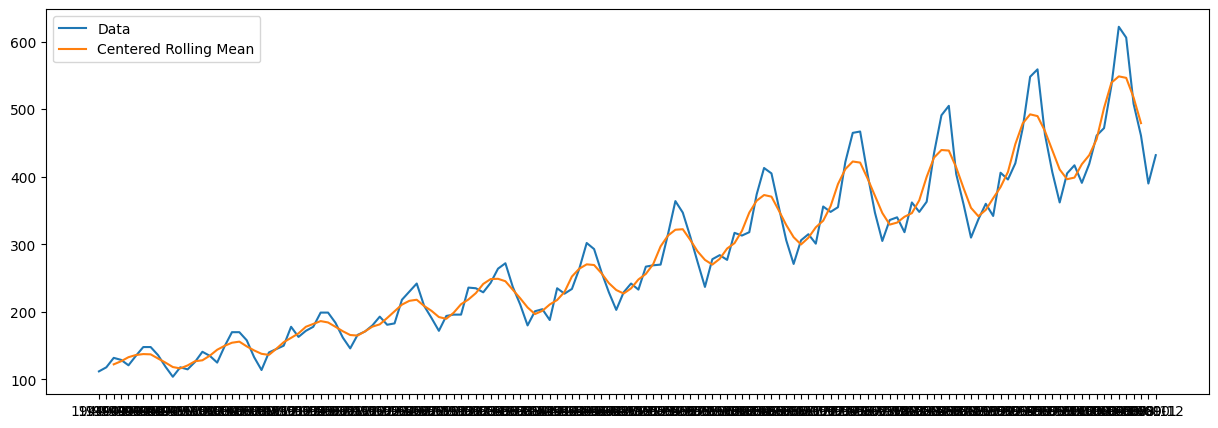

In [82]:
span = 5
fcast = y.rolling(span, center=True).mean()
plt.plot(y, label='Data')
plt.plot(fcast, label='Centered Rolling Mean')
plt.legend(loc='best')
plt.show()

#### Trailing Moving Average

In [83]:
y_train = y[:132]
y_test = y[132:]
y_train.shape, y_test.shape

((132,), (12,))

In [84]:
print(y_train.index)
print(y_test.index)

Index(['1949-01', '1949-02', '1949-03', '1949-04', '1949-05', '1949-06',
       '1949-07', '1949-08', '1949-09', '1949-10',
       ...
       '1959-03', '1959-04', '1959-05', '1959-06', '1959-07', '1959-08',
       '1959-09', '1959-10', '1959-11', '1959-12'],
      dtype='object', name='Month', length=132)
Index(['1960-01', '1960-02', '1960-03', '1960-04', '1960-05', '1960-06',
       '1960-07', '1960-08', '1960-09', '1960-10', '1960-11', '1960-12'],
      dtype='object', name='Month')


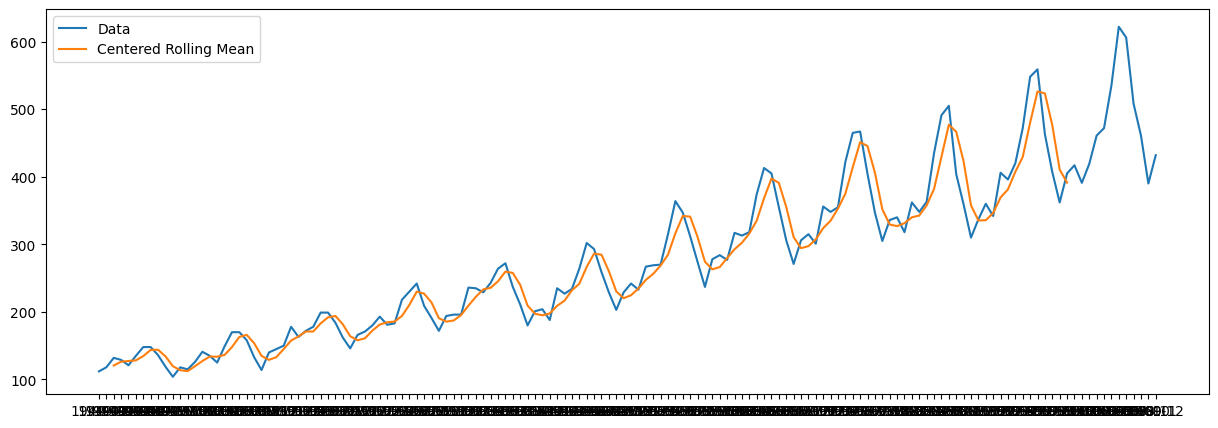

In [86]:
span = 3
fcast = y_train.rolling(span, center=False).mean()
MA = fcast.iloc[-1]
plt.plot(y, label='Data')
plt.plot(fcast, label='Centered Rolling Mean')
plt.legend(loc='best')
plt.show()

In [87]:
MA = fcast.iloc[-1]
fcast = y_train.rolling(span, center=False).mean()

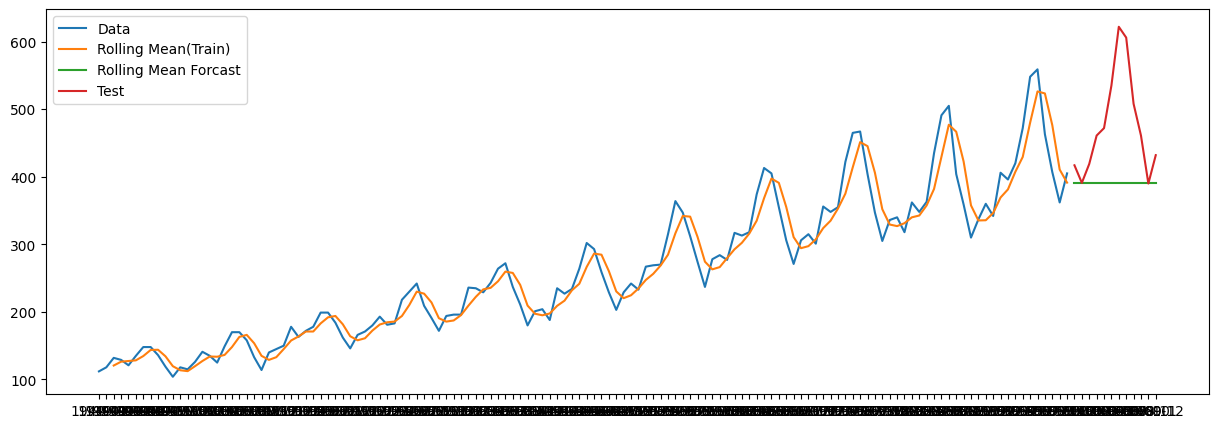

In [88]:
MA = fcast.iloc[-1]
MA_fcast = pd.Series(MA.repeat(len(y_test)), index=y_test.index)
plt.plot(y_train, label = 'Data')
plt.plot(fcast, label = 'Rolling Mean(Train)')
plt.plot(MA_fcast, label = 'Rolling Mean Forcast')
plt.plot(y_test, label = 'Test')
plt.legend(loc = 'best')
plt.show()

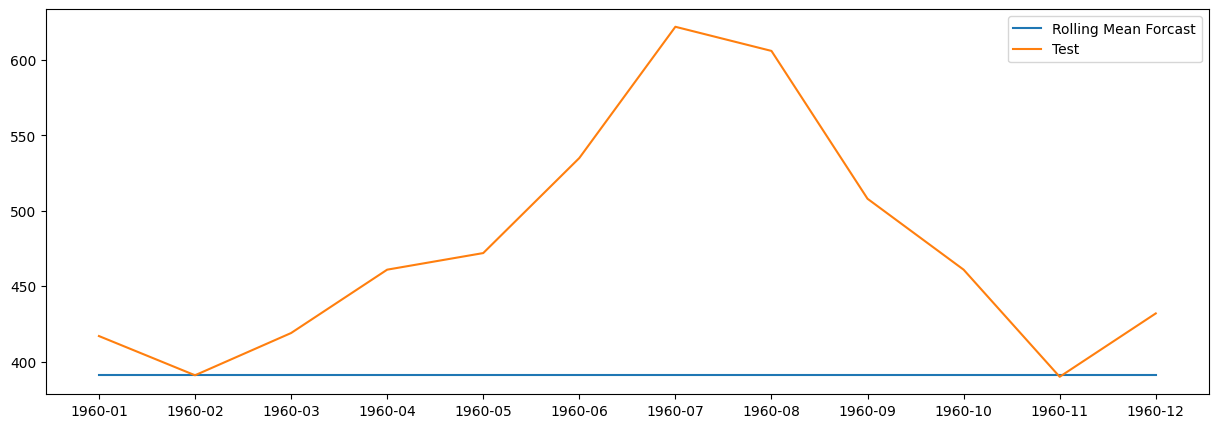

In [89]:
plt.plot(MA_fcast, label = 'Rolling Mean Forcast')
plt.plot(y_test, label = 'Test')
plt.legend(loc = 'best')
plt.show()

In [90]:
from sklearn.metrics import root_mean_squared_error
root_mean_squared_error(y_test,MA_fcast)

112.85462625283321

In [91]:
span = 7      # Always check for better span
MA = fcast.iloc[-1]
MA_fcast = pd.Series(MA.repeat(len(y_test)), index=y_test.index)
fcast = y_train.rolling(span, center=False).mean()
MA = fcast.iloc[-1]
root_mean_squared_error(y_test,MA_fcast)

112.85462625283321

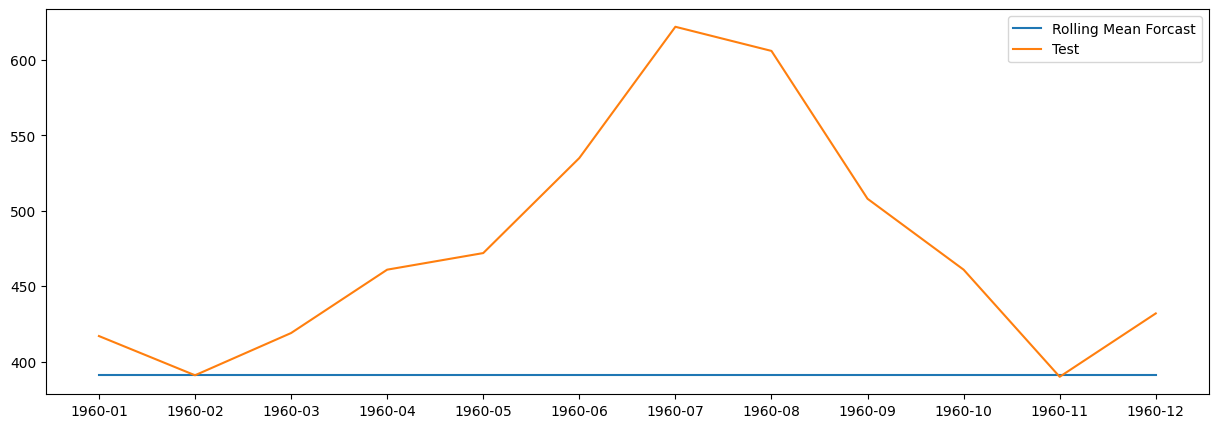

In [92]:
plt.plot(MA_fcast, label = 'Rolling Mean Forcast')
plt.plot(y_test, label = 'Test')
plt.legend(loc = 'best')
plt.show()

# Simple Exponentional Smoothing

In [93]:
from statsmodels.tsa.api import SimpleExpSmoothing

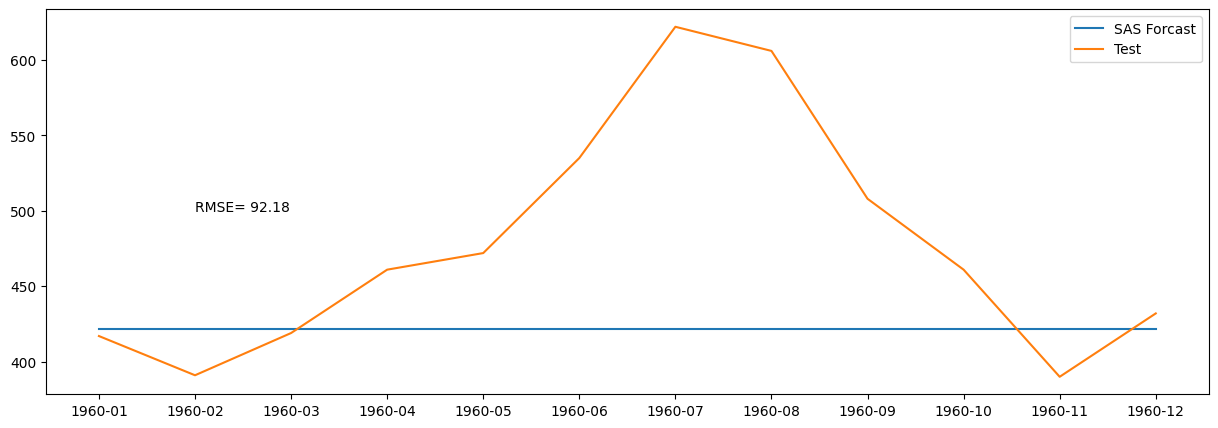

In [107]:
alpha = 0.3 
ses = SimpleExpSmoothing(y_train)
fit1 = ses.fit(smoothing_level= alpha)
fcast1 = fit1.forecast(len(y_test))

sas_fcast = pd.Series(fcast1, index= y_test.index)
error = round(root_mean_squared_error(y_test, sas_fcast),2)
plt.text(1, 500, 'RMSE= '+str(error))
plt.plot(sas_fcast, label = 'SAS Forcast')
plt.plot(y_test, label = 'Test')
plt.legend(loc = 'best')
plt.show()

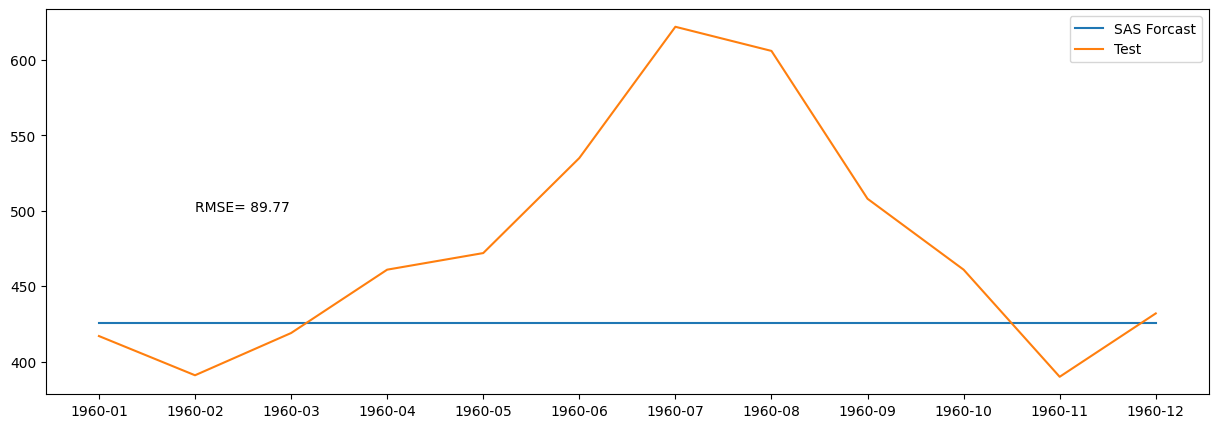

In [108]:
# Finding Best value of Alpha
alpha = 0.2
ses = SimpleExpSmoothing(y_train)
fit1 = ses.fit(smoothing_level= alpha)
fcast1 = fit1.forecast(len(y_test))

sas_fcast = pd.Series(fcast1, index= y_test.index)
error = round(root_mean_squared_error(y_test, sas_fcast),2)
plt.text(1, 500, 'RMSE= '+str(error))
plt.plot(sas_fcast, label = 'SAS Forcast')
plt.plot(y_test, label = 'Test')
plt.legend(loc = 'best')
plt.show()